# MSDS 7331: Data Mining
# Lab 1: Visualization and Data Preprocessing
# 26 May 2019
## Authors: Meredith Ludlow, Anand Rajan, Kristen Rollins, and Tej Tenmattam

---

### Business Understanding

Importing necessary packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import altair as alt
import os
print(os.listdir("Data"))

['acs2015_census_tract_data.csv', 'acs2015_county_data.csv', 'acs2017_census_tract_data.csv', 'acs2017_county_data.csv']


Reading every csv file as pandas dataframe

2017 Census Tract Data

In [7]:
df_17_census = pd.read_csv('Data/acs2017_census_tract_data.csv')
np.random.seed(0)
# this is to set seed for reporducibility
df_17_census.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [5]:
import pandas as pd
import numpy as np

df_17_census.info() # list all columns and data types
df_17_census.describe() # Statistics on the data features

df_17_census['TractId'].is_unique # if data does not have duplicates

# Set index on the records
df_17_census.set_index('TractId', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
TractId             74001 non-null int64
State               74001 non-null object
County              74001 non-null object
TotalPop            74001 non-null int64
Men                 74001 non-null int64
Women               74001 non-null int64
Hispanic            73305 non-null float64
White               73305 non-null float64
Black               73305 non-null float64
Native              73305 non-null float64
Asian               73305 non-null float64
Pacific             73305 non-null float64
VotingAgeCitizen    74001 non-null int64
Income              72885 non-null float64
IncomeErr           72885 non-null float64
IncomePerCap        73256 non-null float64
IncomePerCapErr     73256 non-null float64
Poverty             73159 non-null float64
ChildPoverty        72891 non-null float64
Professional        73190 non-null float64
Service             73190 non-null float64


In [6]:
#Total number of cell columns
totCols=np.product(df_17_census.shape)
print (totCols)

#Total count of missing values by column

misCnt = df_17_census.isnull().sum()
print(misCnt)
#Total of all missing counts columns
totMisCnt = misCnt.sum()
print(totMisCnt)

#Percentage of missing values among total
print("2017 census data set contains", round(((totMisCnt/totCols) * 100), 2), "%", "missing values.")

print("2017 census percentage missing income data = ", (round(((misCnt['Income']/df_17_census.shape[0])*100), 2)))

2664036
State                  0
County                 0
TotalPop               0
Men                    0
Women                  0
Hispanic             696
White                696
Black                696
Native               696
Asian                696
Pacific              696
VotingAgeCitizen       0
Income              1116
IncomeErr           1116
IncomePerCap         745
IncomePerCapErr      745
Poverty              842
ChildPoverty        1110
Professional         811
Service              811
Office               811
Construction         811
Production           811
Drive                801
Carpool              801
Transit              801
Walk                 801
OtherTransp          801
WorkAtHome           801
MeanCommute          946
Employed               0
PrivateWork          811
PublicWork           811
SelfEmployed         811
FamilyWork           811
Unemployment         810
dtype: int64
23711
2017 census data set contains 0.89 % missing values.
2017 census percenta

In [7]:
#df['col'] = df['col'].fillna(' ')
# Fill NaN with 99
#df['col'] = df['col'].fillna(99)
# Fill NaN with the mean of the column
#df['col'] = df['col'].fillna(df['col'].mean())

#Try removing all the census data with missing values
df_17_cln = df_17_census.dropna(axis=1)
df_17_cln.head()

print("Vars in orig dataset: %d \n" % df_17_census.shape[1])
print("Vars where NAs dropped: %d" % df_17_cln.shape[1])


Vars in orig dataset: 36 

Vars where NAs dropped: 7


2017 Census County Data

In [9]:
df_17_county = pd.read_csv('Data/acs2017_county_data.csv')
df_17_county.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [4]:
# get unique values in "State" 
print(set(df_17_census['State']))

{'Hawaii', 'Delaware', 'Virginia', 'Montana', 'Connecticut', 'Wyoming', 'Iowa', 'Oregon', 'Pennsylvania', 'Alaska', 'New Jersey', 'Massachusetts', 'New Mexico', 'South Carolina', 'South Dakota', 'Minnesota', 'Colorado', 'Puerto Rico', 'Kansas', 'Wisconsin', 'Alabama', 'Idaho', 'Oklahoma', 'Rhode Island', 'Maine', 'Illinois', 'Mississippi', 'Ohio', 'Vermont', 'New York', 'Utah', 'Florida', 'Georgia', 'Washington', 'Nebraska', 'Arizona', 'Arkansas', 'Michigan', 'Tennessee', 'Missouri', 'New Hampshire', 'North Carolina', 'Nevada', 'Kentucky', 'West Virginia', 'California', 'Maryland', 'Texas', 'District of Columbia', 'North Dakota', 'Indiana', 'Louisiana'}


In [ ]:
# county counts for each state
county = df_17_census[['State','County']].groupby('State').agg('count')
county.sort_values('County', ascending = 0)

In [8]:
# group by state 
agg_df = df_17_census.groupby('State').sum()

# order by total population 
agg_df.sort_values('TotalPop', ascending = 0)

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
State,,,,,,,,,,,,,,,,,,,,,
California,38982847,19366579,19616268,302436.7,315375.1,44892.6,3313.3,107156.8,2759.2,24970109,...,22399.8,20733.1,45715.2,228959.0,17993915,620398.1,109397.2,67760.9,1452.9,62920.2
Texas,27419612,13616977,13802635,202801.5,228527.0,60967.3,1339.6,19979.0,394.9,17512737,...,9458.8,9144.9,22393.0,131499.3,12689069,414609.8,70444.0,36390.6,958.8,32215.1
Florida,20278447,9914361,10364086,92946.1,241849.5,62980.4,907.6,9755.7,214.1,14461395,...,7415.3,10203.7,25437.6,109921.5,9018570,339459.8,50039.8,26248.3,749.5,30999.0
New York,19798228,9604111,10194117,85416.7,271279.1,75126.7,1549.4,40088.7,145.1,13741921,...,30663.7,8843.8,19715.6,159436.6,9467631,379901.5,75897.8,27994.1,713.0,34626.6
Illinois,12854526,6312600,6541926,49471.6,187929.5,53232.0,363.4,14468.4,69.0,9043520,...,9741.8,5713.0,13586.4,88953.9,6181653,257640.6,38630.2,14767.4,464.6,26445.4
Pennsylvania,12790505,6260160,6530345,21033.6,245248.3,37292.0,375.7,9474.1,60.0,9740191,...,14107.3,4723.6,13608.3,84309.5,6096977,269785.3,33345.0,16119.4,449.6,22520.6
Ohio,11609756,5686081,5923675,11400.6,221391.1,47780.6,479.1,5118.4,84.8,8761633,...,7820.7,3853.0,10575.6,68155.4,5488180,244297.7,34850.6,14233.6,418.0,23191.2
Georgia,10201635,4968887,5232748,16878.2,104547.2,63297.9,359.5,6377.5,89.7,7155973,...,3654.1,3549.9,9373.8,52735.2,4606329,154053.7,30032.9,10906.2,309.3,15977.4
North Carolina,10052564,4895368,5157196,19018.7,138775.6,46526.9,2364.8,5285.6,117.1,7309766,...,4384.0,3096.2,10858.4,52077.2,4571020,172143.5,31173.4,12831.1,354.8,16476.8


In [ ]:
# Create a new dataset which contains data of states with top 5 total population
ca = df_17_census.groupby('State').get_group('California')
tx = df_17_census.groupby('State').get_group('Texas')
ny = df_17_census.groupby('State').get_group('New York')
fl = df_17_census.groupby('State').get_group('Florida')
il = df_17_census.groupby('State').get_group('Illinois')
df_17_census_5 = pd.concat([ca,tx,ny,fl,il])
df_17_census_5.head()

### Data Meaning and Type
We have Census data from 2017 done by American community survey with 37 variables available for our analysis. There are in total 74001 rows in total and we will be utilizing all data for our analysis. 
The attribute definitions are shown as below:

| Attribute | Data Type | Description |
|-----------|-----------|-------------|
| TractID | Nominal | Unique identification number for the census tract |
| State | Nominal | U.S. state or territory the tract is located in |
| County | Nominal | County or county-equivalent the tract is located in |
| TotalPop | Integer | Total population of the census area |
| Men | Integer | Number of men living in the census tract |
| Women | Integer | Number of women living in the census tract |
| Hispanic | Decimal | Percentage of population that is Hispanic/Latino |
| White | Decimal | Percentage of population that is white |
| Black | Decimal | Percentage of population that is black |
| Native | Decimal | Percent of population that is Native American |
| Asian | Decimal | Percent of population that is Asian |
| Pacific | Decimal | Percent of population that is Native Hawaiian or other Pacific Islander |
| VotingAgeCitizen | Integer | Number of voting age citizens in the census tract |
| Income | Decimal | Median household income in USD (\$) |
| IncomeErr | Decimal | Median household income error (\$) |
| IncomePerCap | Decimal | Income per capita (\$) |
| IncomePerCapErr | Decimal | Income per capita error (\$) |
| Poverty | Decimal | Percentage of population under the poverty level |
| ChildPoverty | Decimal | Percentage of children under the poverty level |
| Professional | Decimal | Percent employed in management, business, science, and arts |
| Service | Decimal | Percent employed in service jobs |
| Office | Decimal | Percent employed in sales and office jobs |
| Construction | Decimal | Percent employed in natural resources, construction, and maintenance |
| Production | Decimal | Percent employed in production, transportation, and material movement |
| Drive | Decimal | Percent commuting alone in a car, van, or truck |
| Carpool | Decimal | Percent carpooling in a car, van, or truck |
| Transit | Decimal | Percent commuting on public transportation |
| Walk | Decimal | Percent walking to work |
| OtherTransp | Decimal | Percent commuting via other means |
| WorkAtHome | Decimal | Percentage working at home |
| Mean Commute | Decimal | Mean commute time in minutes |
| Employed | Integer | Number of people employed (16+) |
| PrivateWork | Decimal | Percentage employed in private industry |
| PublicWork | Decimal | Percentage employed in public jobs |
| SelfEmployed | Decimal | Percent self-employed
| FamilyWork | Decimal | Percentage in unpaid family work |
| Unemployed | Decimal | Unemployment rate (%) |

### Data Quality

In [38]:
import pandas as pd
import numpy as np

df_17_census.info() # list all columns and data types
df_17_census.describe() # Statistics on the data features

df_17_census['TractId'].is_unique # if data does not have duplicates

# Set index on the records
df_17_census.set_index('TractId', inplace=True)

#Following code to drop columns unwanted for analysis
#col_drop = ['TractId', 'County']
#df_17_census.drop(col_drop, inplace=True, axis=1)

df_17_census_5.isna().sum() # missing values for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
TractId             74001 non-null int64
State               74001 non-null object
County              74001 non-null object
TotalPop            74001 non-null int64
Men                 74001 non-null int64
Women               74001 non-null int64
Hispanic            73305 non-null float64
White               73305 non-null float64
Black               73305 non-null float64
Native              73305 non-null float64
Asian               73305 non-null float64
Pacific             73305 non-null float64
VotingAgeCitizen    74001 non-null int64
Income              72885 non-null float64
IncomeErr           72885 non-null float64
IncomePerCap        73256 non-null float64
IncomePerCapErr     73256 non-null float64
Poverty             73159 non-null float64
ChildPoverty        72891 non-null float64
Professional        73190 non-null float64
Service             73190 non-null float64


NameError: name 'df_17_census_5' is not defined

 1    30608
 0    19303
 2    13292
 3     5227
 4     2832
-1     1610
 5     1129
Name: UnEmpCd, dtype: int64


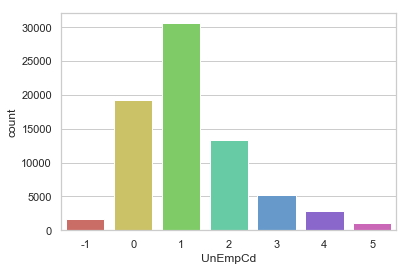

In [37]:
#Categorizing the unemployed percentages in range.
bins = pd.IntervalIndex.from_tuples([(0,4), (4,8), (8,12), (12,16), (16,22), (22,30)])
UnEmp = pd.cut(df_17_census.Unemployment, bins)
UnEmp = UnEmp.to_frame()
UnEmp.columns = ['UnEmpCat']
df_new = pd.concat([df_17_census,UnEmp],axis =1)
df_new.UnEmpCat = pd.Categorical(df_new.UnEmpCat)

df_new['UnEmpCd'] = df_new.UnEmpCat.cat.codes

print (df_new.UnEmpCd.value_counts())

#Show histogram of the categories
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
#draw histogram plot
sns.countplot(x = 'UnEmpCd', data = df_new, palette = 'hls')
plt.show()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52]), <a list of 52 Text xticklabel objects>)

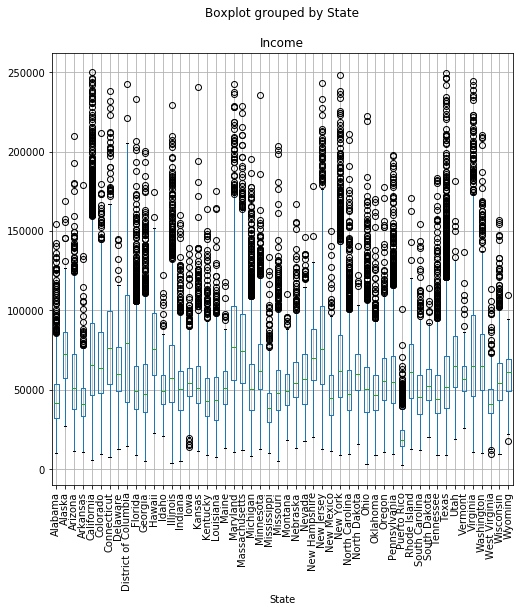

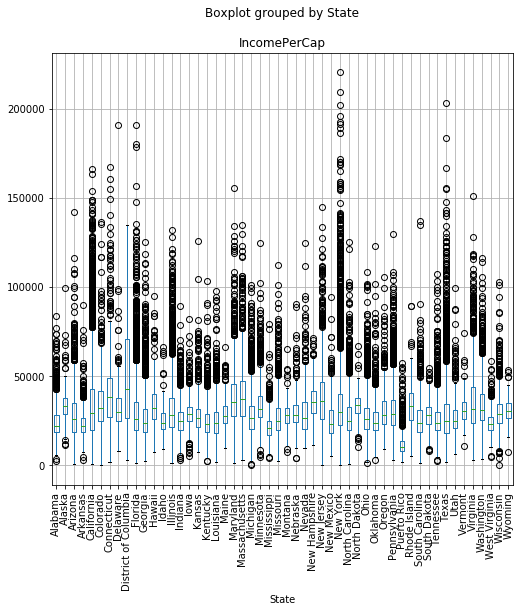

In [10]:
df_17_census.boxplot(column="Income",  # Column to plot
                 by= "State",         # Column to split upon
                 figsize= (8,8))        # Figure size
plt.xticks(rotation=90)
df_17_census.boxplot(column="IncomePerCap",  # Column to plot
                 by= "State",         # Column to split upon
                 figsize= (8,8))        # Figure size
plt.xticks(rotation=90)


In [2]:
df_17_census_5.isna().sum() # missing values for each column

NameError: name 'df_17_census_5' is not defined

In [15]:
np.count_nonzero(df_17_census_5.isna()) # number of rows with missing values

7959

In [16]:
df_17_census_5.shape # dimensions of dataframe

(25608, 37)

### Simple Statistics

In [8]:
df_17_county.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [9]:
census_tract_income = df_17_census[['TractId', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr']]
census_tract_income.head()

,TractId,Income,IncomeErr,IncomePerCap,IncomePerCapErr
0,1001020100,67826.0,14560.0,33018.0,6294.0
1,1001020200,41287.0,3819.0,18996.0,2453.0
2,1001020300,46806.0,9496.0,21236.0,2562.0
3,1001020400,55895.0,4369.0,28068.0,3190.0
4,1001020500,68143.0,14424.0,36905.0,10706.0


In [10]:
county_income = df_17_county[['CountyId', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr']]
county_income.head()

,CountyId,Income,IncomeErr,IncomePerCap,IncomePerCapErr
0,1001,55317,2838,27824,2024
1,1003,52562,1348,29364,735
2,1005,33368,2551,17561,798
3,1007,43404,3431,20911,1889
4,1009,47412,2630,22021,850


In [11]:
census_tract_mean = census_tract_income['Income'].mean()
census_tract_median = census_tract_income['Income'].median()
print('From 2017 Census Tract data, household mean income is ' + str(census_tract_mean) + ', and household median income is ' +
      str(census_tract_median))

From 2017 Census Tract data, household mean income is 61086.829265280925, and household median income is 54375.0


In [12]:
county_income_mean = county_income['Income'].mean()
county_income_median = county_income['Income'].median()
print('From 2017 County data, household mean income is ' + str(county_income_mean) + ', and household median income is ' +
      str(county_income_median))

From 2017 County data, household mean income is 48994.966770186336, and household median income is 47636.5


### Visualize Attributes

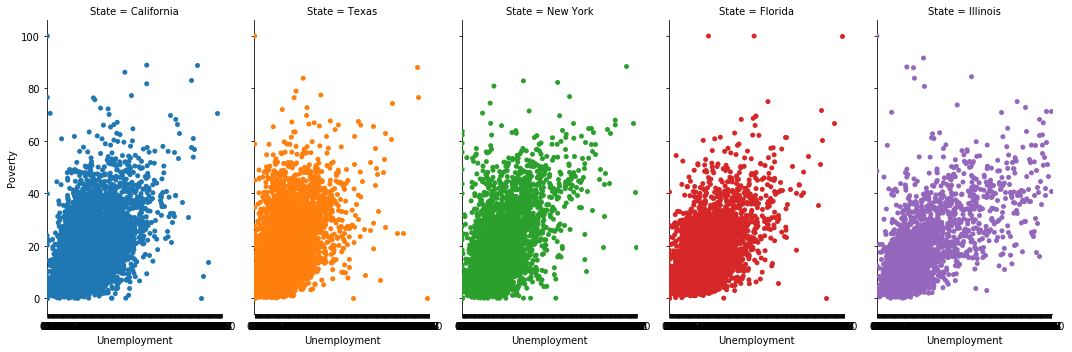

In [13]:
sns.catplot(x="Unemployment", y="Poverty", hue="State",
            col="State", aspect=.6,
            kind="swarm", data=df_17_census_5);

### Explore Joint Attributes

### Explore Attributes and Class

### New Features